# data acquisition

In [14]:
import pandas as pd

In [15]:
_file = "data/ionosphere.data"
df = pd.read_csv(_file)

In [16]:
print(df.head())
print(df.shape)

   1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b  
1  -0.24180  0

In [17]:
# definir columnas
# f1_r, f1_i, f2_r, f2_i, ..., f17_r, f17_i, target --> df["f1_r"]
columns = list() # []
for i in range(1,18):
  col1 = 'f'+str(i)+'_r'
  col2 = 'f'+str(i)+'_i'
  columns.append(col1)
  columns.append(col2)

columns.append('target')

# agregar nombres columnas al df
df.columns = columns
print(df.head)

<bound method NDFrame.head of      f1_r  f1_i     f2_r     f2_i     f3_r     f3_i     f4_r     f4_i  \
0       1     0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
1       1     0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
2       1     0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
3       1     0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   
4       1     0  0.02337 -0.00592 -0.09924 -0.11949 -0.00763 -0.11824   
..    ...   ...      ...      ...      ...      ...      ...      ...   
345     1     0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567   
346     1     0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920   
347     1     0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431   
348     1     0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646   
349     1     0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260   

        f5_r     f5_i  ...    f13_i    f14_r    f14_i    f15_r    f15_i  \
0    1.00000 -0.04

# pre processing

In [18]:
# convertir columns "target" a números. g--> 1, b--> 0
classCategorizacion = {'g':1, 'b':0}
df['target'] = df['target'].map(classCategorizacion)

In [19]:
print(df.head())

   f1_r  f1_i     f2_r     f2_i     f3_r     f3_i     f4_r     f4_i     f5_r  \
0     1     0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
1     1     0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
2     1     0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
3     1     0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
4     1     0  0.02337 -0.00592 -0.09924 -0.11949 -0.00763 -0.11824  0.14706   

      f5_i  ...    f13_i    f14_r    f14_i    f15_r    f15_i    f16_r  \
0 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
1  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
2  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
3 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   
4  0.06637  ... -0.01535 -0.03240  0.09223 -0.07859  0.00732  0.00000   

     f16_i    f17_r    f17_i  target  
0 -0.06288 -0.13738 -0.02447       0  
1 

# Feature engineering

In [20]:
# from matplotlib import pyplot as plt

In [21]:
# verificar balance de datos
amountOfGoodsAndBads = df['target'].value_counts()
print("cantidades originales", amountOfGoodsAndBads)

#plt.figure()
#plt.hist(df['target'])

# balancear datos
counter = 98
dfNew = pd.DataFrame()
for index, row in df.iterrows():
  if(counter>0):
    # caso de señal buena
    if(row['target']==1):
      counter -= 1
    else:
      # caso de señal mala
      dfNew = dfNew.append(row)
  else:
    dfNew = dfNew.append(row)

amountOfGoodsAndBads = dfNew['target'].value_counts()
print("cantidades balanceadas", amountOfGoodsAndBads)

df = dfNew

#plt.figure()
#plt.hist(dfNew['target'])

cantidades originales 1    224
0    126
Name: target, dtype: int64


C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:18: FutureWarning: T

cantidades balanceadas 0.0    126
1.0    126
Name: target, dtype: int64


C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfNew = dfNew.append(row)
C:\Users\enime\AppData\Local\Temp\ipykernel_37600\2116060038.py:20: FutureWarning: T

# data preparation

In [22]:
# dividir features de target
features = df.loc[:, df.columns != "target"]

target = df.loc[:, df.columns == "target"]

print(features.shape)
print(target.shape)

(252, 34)
(252, 1)


In [23]:
# split de datos en entrenamiento/validación y testeo

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)


(201, 34) (51, 34) (201, 1) (51, 1)


In [24]:
amountOfGoods, amountOfBads = [(target_train==1).sum(), (target_train==0).sum()]
print(amountOfGoods)
print(amountOfBads)

target    99
dtype: int64
target    102
dtype: int64


# modeling

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
#from keras.metrics import Accuracy
import tensorflow as tf

In [29]:
print(features_train.shape)

(201, 34)


In [28]:
my_input_dim = features_train.shape[1]

# configurar modelo
model = Sequential()
model.add(Dense(34, input_dim=my_input_dim))
model.add(Activation("tanh"))
model.add(Dense(1))
model.add(Activation("relu"))

model.compile(loss='binary_crossentropy' ,optimizer='rmsprop' ,metrics=[tf.keras.metrics.Accuracy()] )

# entrenar modelo
history = model.fit(features_train, target_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
5/5 [==============================] - 1s 43ms/step - loss: 8.2611 - accuracy: 0.3375 - val_loss: 4.6870 - val_accuracy: 0.4634
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 8.2217 - accuracy: 0.3938 - val_loss: 4.7104 - val_accuracy: 0.4634
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 8.0557 - accuracy: 0.4000 - val_loss: 4.9544 - val_accuracy: 0.4878
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 7.1606 - accuracy: 0.4062 - val_loss: 4.6807 - val_accuracy: 0.4634
Epoch 5/20
5/5 [==============================] - 0s 6ms/step - loss: 6.9389 - accuracy: 0.3875 - val_loss: 4.6765 - val_accuracy: 0.4634
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 6.9121 - accuracy: 0.3750 - val_loss: 4.3646 - val_accuracy: 0.4634
Epoch 7/20
5/5 [==============================] - 0s 6ms/step - loss: 6.2108 - accuracy: 0.3688 - val_loss: 3.6733 - val_accuracy: 0.4390
Epoch 8/20
5/5 [=================

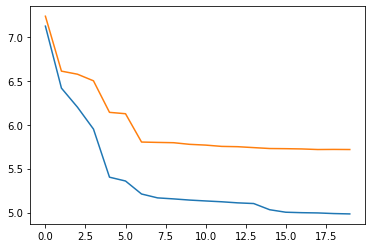

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

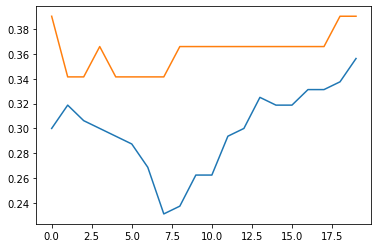

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# classification and metrics

In [46]:
yhat = model.predict(features_test)

In [49]:
from tensorflow._api.v2.math import confusion_matrix
import numpy as np

In [50]:
target_test_new = np.ravel(target_test)
yhat_new = np.ravel(yhat)

In [51]:
print(confusion_matrix(target_test_new, yhat_new, num_classes=2))

tf.Tensor(
[[30  0]
 [13  8]], shape=(2, 2), dtype=int32)
